# ***Sales Store analysis***

In this project, we will analyze the sales of a store. Data are taken from Kaggle, and we will answer the following questions.


In [1]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
df = pd.read_csv('SalesStore.csv')

# Show the first 5 rows of the dataframe
print(df.head())

   Order_Date   Ship_Date Ship_Mode  Postal_Code   Region Product_Reference  \
0  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10022901   
1  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10023012   
2  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10002828   
3  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10022901   
4  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10000482   

          Category Sub_Category  Sales  Quantity  Profit State  
0  Office Supplies         Tape      5         1    0.15    OH  
1  Office Supplies         Tape      5         1    0.15    OH  
2  Office Supplies         Tape      5         1    0.15    OH  
3  Office Supplies         Tape      5         1    0.15    OH  
4  Office Supplies         Tape      5         1    0.15    OH  


In [2]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_Date         216 non-null    object 
 1   Ship_Date          216 non-null    object 
 2   Ship_Mode          216 non-null    object 
 3   Postal_Code        216 non-null    int64  
 4   Region             216 non-null    object 
 5   Product_Reference  216 non-null    object 
 6   Category           216 non-null    object 
 7   Sub_Category       216 non-null    object 
 8   Sales              216 non-null    int64  
 9   Quantity           216 non-null    int64  
 10  Profit             216 non-null    float64
 11  State              216 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 20.4+ KB
None


In [3]:
df.describe()

,Postal_Code,Sales,Quantity,Profit
count,216.000000,216.000000,216.000000,216.000000
mean,55241.750000,290.879630,2.393519,5.843287
std,24946.773328,258.750781,1.085959,5.148745
min,20001.000000,5.000000,1.000000,0.150000
25%,33101.000000,50.000000,1.000000,1.000000
50%,60601.000000,200.000000,2.000000,4.000000
75%,75205.000000,450.000000,3.000000,9.000000
max,98101.000000,900.000000,4.000000,18.000000


In [4]:
df.columns

Index(['Order_Date', 'Ship_Date', 'Ship_Mode', 'Postal_Code', 'Region',
       'Product_Reference', 'Category', 'Sub_Category', 'Sales', 'Quantity',
       'Profit', 'State'],
      dtype='object')

In [5]:
# Transform date column type to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])


In [6]:
# Check unique values in selected columns to detect inconsistencies 
cols = ['Ship_Mode', 'Region', 'Category', 'Sub_Category', 'State']
for col in cols:
    print(f"{col}:", sorted(df[col].unique()))
    print("-" * 40)

Ship_Mode: ['Air', 'Ground']
----------------------------------------
Region: ['East', 'Midwest', 'South', 'West']
----------------------------------------
Category: ['Electronics', 'Furniture', 'Office Supplies']
----------------------------------------
Sub_Category: ['Accessories', 'Beds', 'Bookcases', 'Cameras', 'Chairs', 'Desks', 'Envelopes', 'Erasers', 'Glue', 'Headphones', 'Laptops', 'Lighting', 'Markers', 'Monitors', 'Notebooks', 'Outdoor Furniture', 'Paper', 'Pencils', 'Pens', 'Phones', 'Printers', 'Rulers', 'Scissors', 'Smartphones', 'Smartwatches', 'Sofas', 'Speakers', 'Staplers', 'Storage', 'Tables', 'Tablets', 'Tape']
----------------------------------------
State: ['CA', 'DC', 'FL', 'GA', 'IL', 'OH', 'TX', 'UT', 'WA']
----------------------------------------


In [7]:
# Sum of duplicate rows (excluding the first instance)
num_duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 54


In [8]:
# Remove fully duplicated rows 
df.drop_duplicates(inplace=True)


In [9]:
# Save cleaned version of the dataset
df_cleaned = df.copy() 
df_cleaned.to_csv("cleaned_SalesStore.csv", index=False)

In [10]:
# Start analysis using the cleaned dataset
print(df_cleaned.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 215
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order_Date         162 non-null    datetime64[ns]
 1   Ship_Date          162 non-null    datetime64[ns]
 2   Ship_Mode          162 non-null    object        
 3   Postal_Code        162 non-null    int64         
 4   Region             162 non-null    object        
 5   Product_Reference  162 non-null    object        
 6   Category           162 non-null    object        
 7   Sub_Category       162 non-null    object        
 8   Sales              162 non-null    int64         
 9   Quantity           162 non-null    int64         
 10  Profit             162 non-null    float64       
 11  State              162 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 16.5+ KB
None


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns


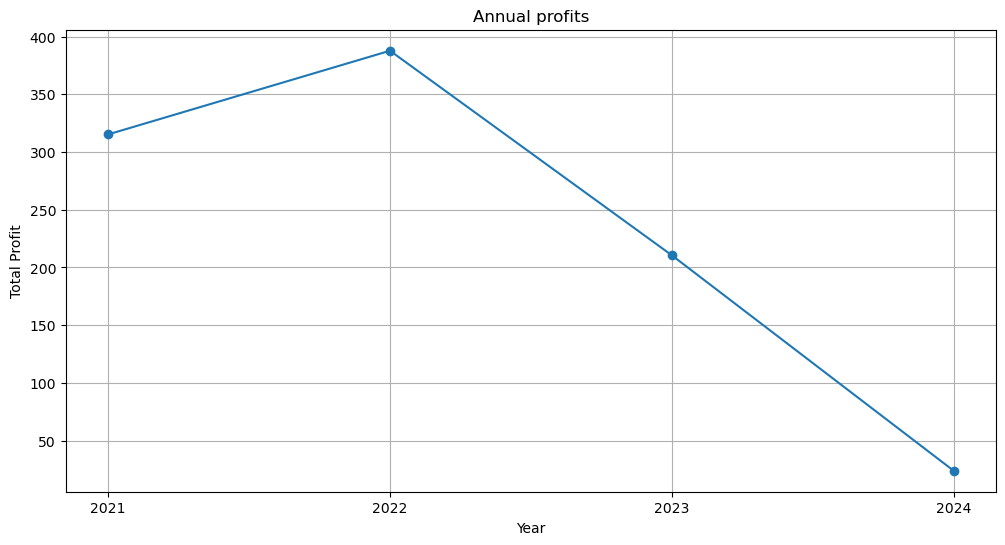

In [12]:
# Extract the year from the Order_Date column
df_cleaned['Year'] = df_cleaned['Order_Date'].dt.year

# Group the data by year and calculate total profit per year
annual_profit = df_cleaned.groupby('Year')['Profit'].sum().sort_index()

# Create a line plot showing total profit by year with markers
plt.figure(figsize=(12, 6))
annual_profit.plot(kind='line' ,marker='o')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Annual profits')
plt.xticks(annual_profit.index) # Set x-axis ticks to show years only
plt.grid(True)

plt.show()



**There is a clear and continuous decline in profits over time,Indicating an issue that requires further investigation.**
<br><br><br>




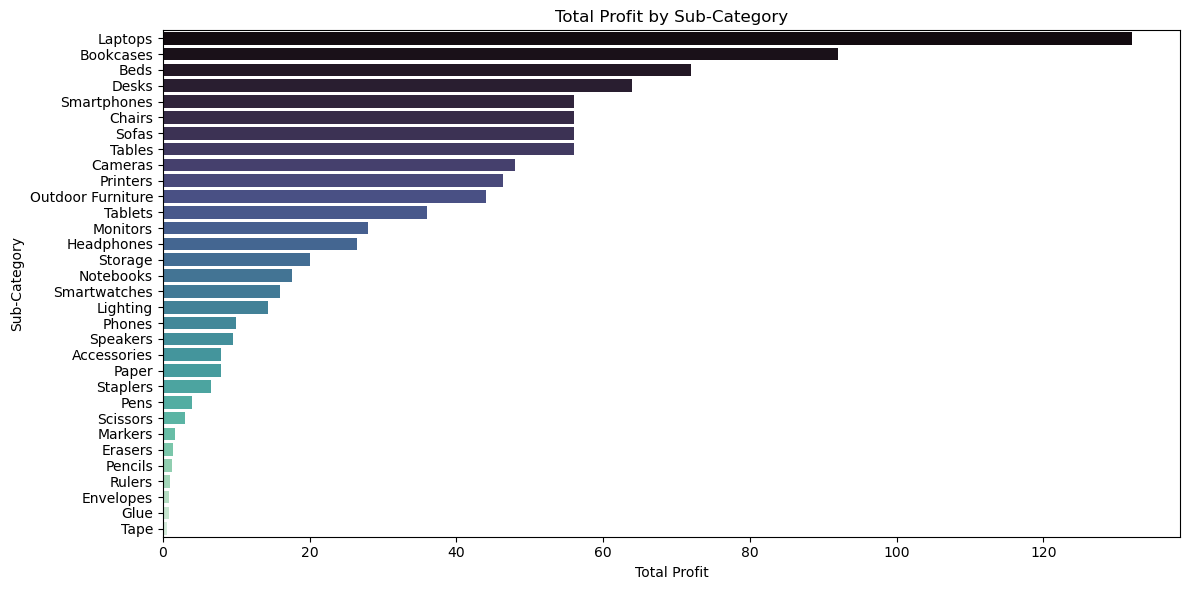

In [13]:
# Group the data by Sub_Category and calculate the total profit 
category_profit = df_cleaned.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).reset_index()

# Create a bar plot to visualize total profit by sub-category
plt.figure(figsize=(12,6))
sns.barplot(data=category_profit,x='Profit', y='Sub_Category',  palette='mako')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()


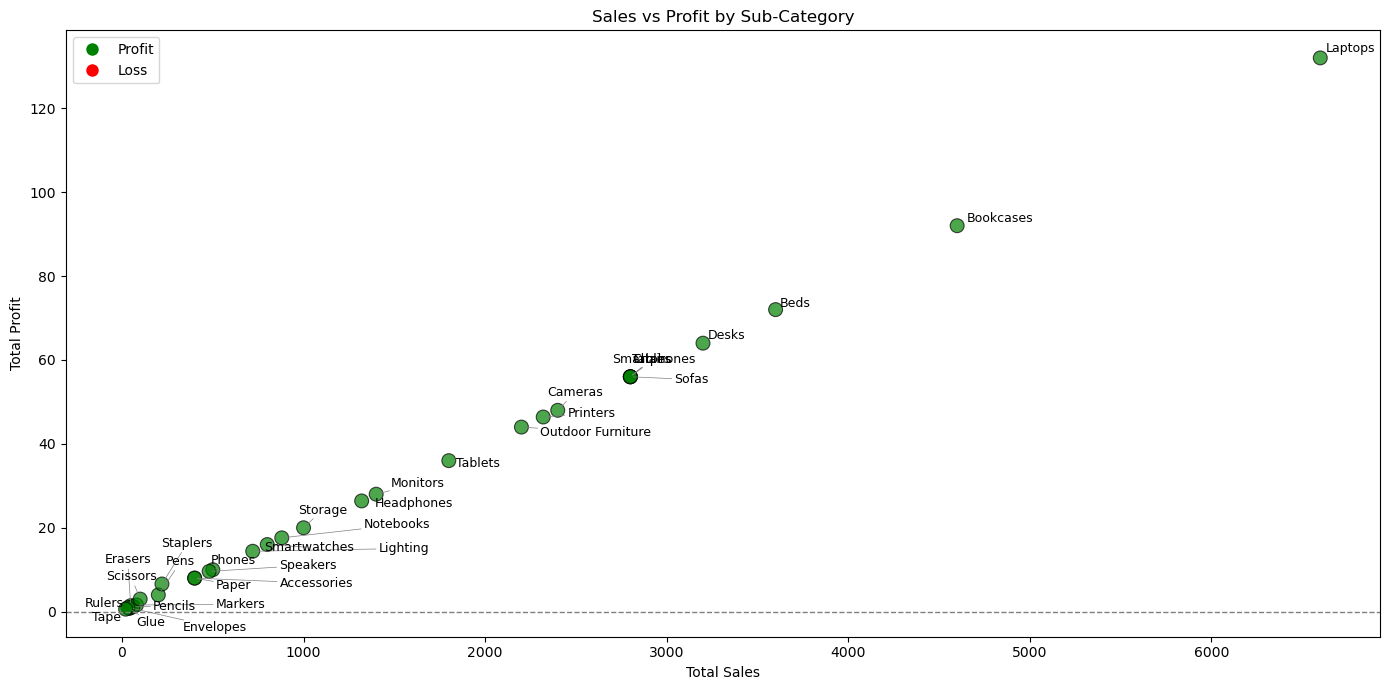

In [14]:
# Import adjust_text to automatically adjust text positions if they overlap
from adjustText import adjust_text
from matplotlib.lines import Line2D # For custom circle markers in the legend

# Group by Sub_Category and calculate total sales , and profits
product_profit = df_cleaned.groupby('Sub_Category').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Add a new column to mark sub-categories with negative total profit as losses
product_profit['Is_Loss'] = product_profit['Total_Profit'] < 0



# Create a scatter plot explains the relationship between sales and profit
plt.figure(figsize=(14, 7))
scatter = sns.scatterplot(
    data=product_profit,
    x='Total_Sales',
    y='Total_Profit',
    hue='Is_Loss',
    palette={ False: 'green', True: 'red'},
    s=100,
     edgecolor='black',
    alpha=0.7,
    legend= False
)

# Draw a line showing profit = 0
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Add labels with overlapping control
texts = []
for x, y, label in zip(product_profit['Total_Sales'], product_profit['Total_Profit'], product_profit['Sub_Category']):
    texts.append(plt.text(x, y, label, fontsize=9))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Manually create custom legend for profit and loss points
custom_legend = [
    Line2D([0], [0], marker='o', color='w', label='Profit', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Loss', markerfacecolor='red', markersize=10)
]
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.title('Sales vs Profit by Sub-Category')

plt.legend(handles=custom_legend)
plt.tight_layout()
plt.show()


**This chart illustrates the relationship between total sales and total profit for each product sub-category.** </br>
We observe that high-sales products tend to generate higher absolute profits, indicating a positive correlation between sales and profit.<br>
However, many products are positioned close to the break-even line (where profit equals zero), suggesting that their profits are relatively low and may not significantly contribute to overall profitability.
<br><br><br>

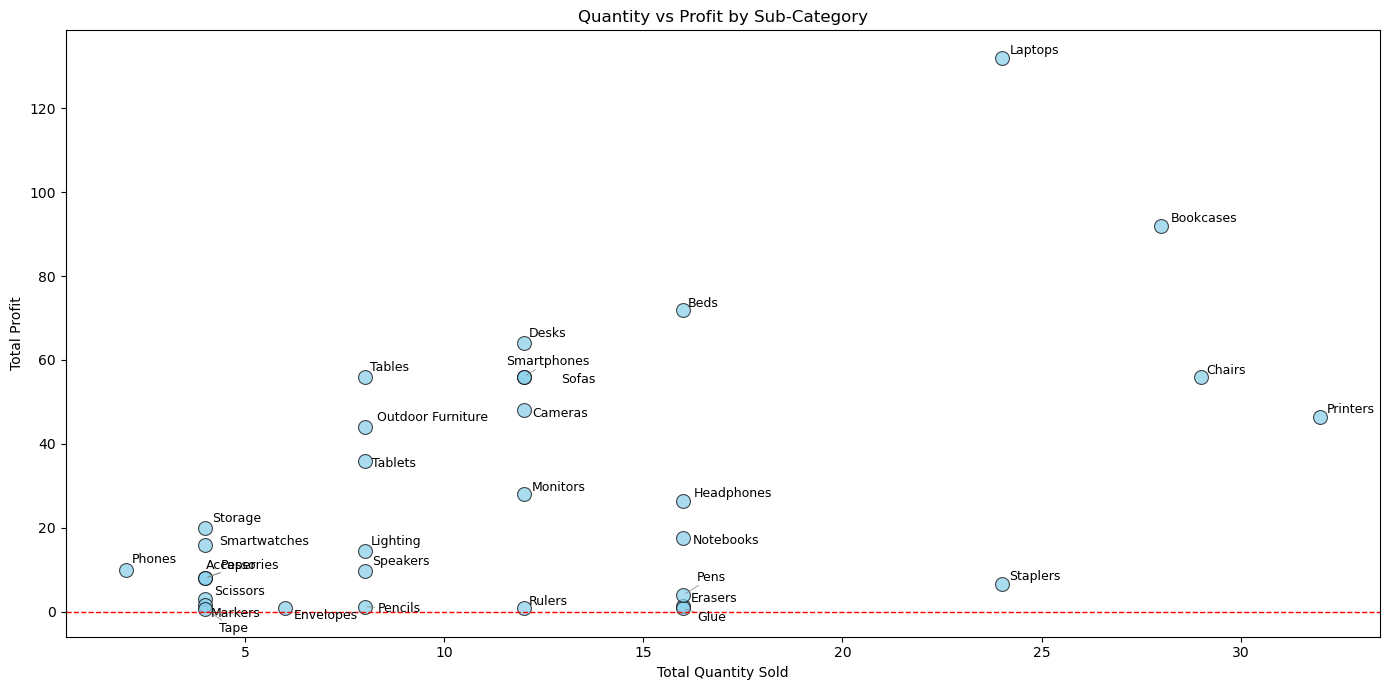

In [15]:
quantity = df_cleaned.groupby('Sub_Category').agg(
    total_profit=('Profit', 'sum'),
    total_quantity=('Quantity', 'sum')
).sort_values('total_quantity',ascending=False).reset_index()


# Create a scatter plot explains the relationship between Quantity and profit
plt.figure(figsize=(14, 7))
scatter = sns.scatterplot(
    data=quantity,
    x='total_quantity',
    y='total_profit',
    s=100,
    color= 'skyblue',
    edgecolor='black',
    alpha=0.7,
    legend= False
)

# Draw a line showing profit = 0
plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add labels with overlapping control
texts = []
for x, y, label in zip(quantity['total_quantity'], quantity['total_profit'], quantity['Sub_Category']):
    texts.append(plt.text(x, y, label, fontsize=9))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))


plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Profit')
plt.title('Quantity vs Profit by Sub-Category')

plt.tight_layout()
plt.show()

**This plot shows the relationship between the quantity sold and total profit.** <br> 
We notice that some low-cost products (such as Staplers and Erasers) are sold in moderate to high quantities, yet still generate low absolute profits. <br>
In contrast, other products (like Laptops and Smartphones) sell in average quantities but yield higher total profits.
<br><br><br>

In [16]:
# Group by Sub_Category and calculate total profits, sales, and quantity 
# Then Sort the result by total_profit in descending order
product_stats = df_cleaned.groupby('Sub_Category').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum'),
    total_quantity=('Quantity', 'sum')
).sort_values('total_profit',ascending=False)

# Calculate the profit margin for each sub-category
product_stats['profit_margin'] = product_stats['total_profit'] / product_stats['total_sales']

# Display the result in a table
print(product_stats)

                   total_sales  total_profit  total_quantity  profit_margin
Sub_Category                                                               
Laptops                   6600        132.00              24           0.02
Bookcases                 4600         92.00              28           0.02
Beds                      3600         72.00              16           0.02
Desks                     3200         64.00              12           0.02
Smartphones               2800         56.00              12           0.02
Chairs                    2800         56.00              29           0.02
Sofas                     2800         56.00              12           0.02
Tables                    2800         56.00               8           0.02
Cameras                   2400         48.00              12           0.02
Printers                  2320         46.40              32           0.02
Outdoor Furniture         2200         44.00               8           0.02
Tablets     

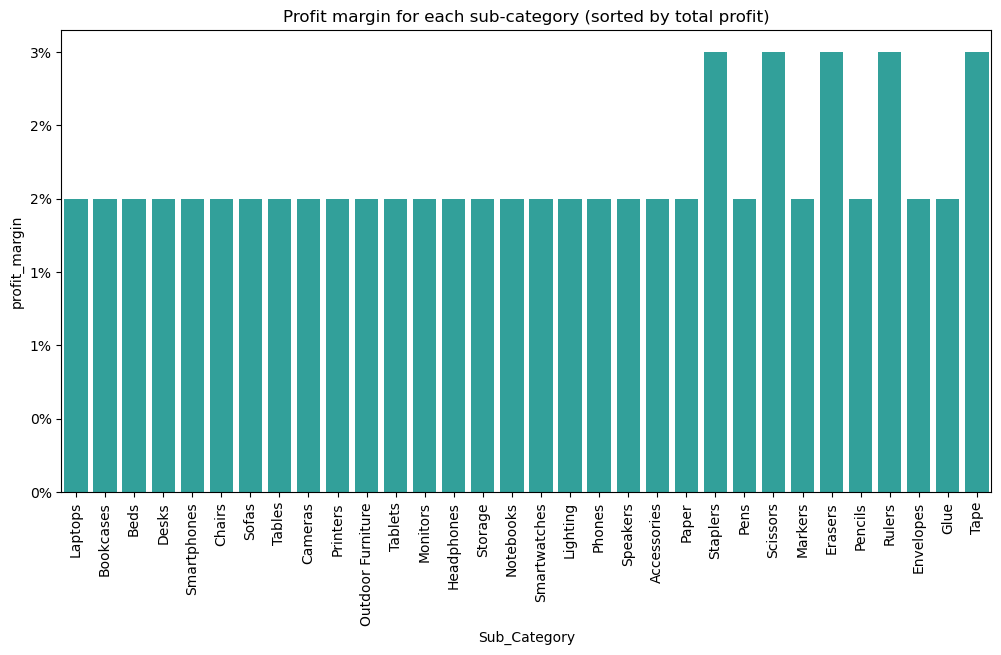

In [17]:

product_stats = df_cleaned.groupby('Sub_Category').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum'),
    total_quantity=('Quantity', 'sum')
).sort_values('total_profit',ascending=False).reset_index()

# Calculate the profit margin for each sub-category
product_stats['profit_margin'] = product_stats['total_profit'] / product_stats['total_sales']

plt.figure(figsize=(12, 6))
sns.barplot(data=product_stats ,x='Sub_Category', y='profit_margin', color='lightseagreen')
plt.xticks(rotation = 90)
plt.xlabel('Sub_Category')
plt.ylabel('profit_margin')

# To converting values from decimal numbers to percentages in yaxis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y*100)}%'))

plt.title('Profit margin for each sub-category (sorted by total profit)')
plt.show()


**This chart displays profit margins for each sub-category, ranked by total profit.** <br> 
Products like (Laptops, Chairs) achieve high sales and total profits but operate at relatively low margins (2%). <br>
On the other hand, items such as (Rulers, Staplers)show higher profit margins (3%) but contribute less to total profit, primarily due to their low selling prices rather than weak demand.
<br><br><br>

# *Conclusion:* 
The analysis highlights the need for a balanced pricing strategy that considers both sales volume and profitability. The following actions are recommended:

- **Optimize pricing for top-selling and high-profit products** (e.g., *Laptops*, *Chairs*) to maximize overall profitability.
- **Promote low-cost, high-margin products** (e.g., *Staplers*, *Erasers*) by increasing their sales volume to enhance their cumulative contribution.
<br><br>